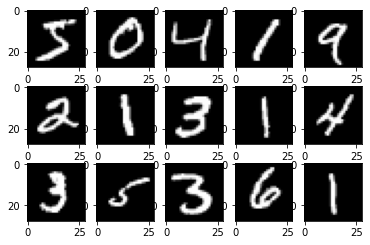

In [12]:
from keras.utils import np_utils
from src.models import *
from src.viz import *
from keras.datasets.mnist import load_data
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

visualize_mnist([x for x in range(15)])

def run_mnist(name, cnn=False):
    (x_train, y_train), (x_test, y_test) = load_data()
    # Set input shape and reshape dataset
    input_shape = (28, 28, 1)
    if cnn:
        x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
        x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')     
    else:
        num_pixels = x_train.shape[1] * x_train.shape[2]
        x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
        x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')
    
    # Scale values from [0, 255] to [0, 1]
    x_train = x_train / 255
    x_test = x_test / 255
    
    # One-hot encode the target labels
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    
    # Build model
    model = create_model(name, input_shape, num_classes)
    print_model(model,f"img/{name}.png")
    
    # Train the model
    history = model.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10, 
                        batch_size=200,
                        verbose=1
                        )
    
    plot_history_metrics(history, ['accuracy', 'loss'])
    
    return history


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.2827 - accuracy: 0.9195 - val_loss: 0.1343 - val_accuracy: 0.9600

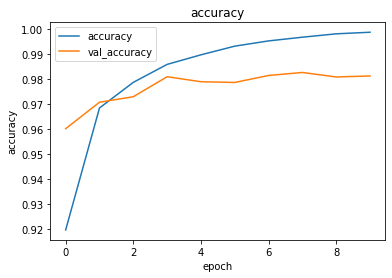

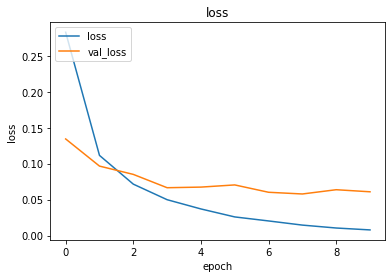

In [2]:
# MLP baseline
mlp_hist = run_mnist('mnist_mlp')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.2492 - accuracy: 0.9282 - val_loss: 0.0818 - val_accuracy: 0.9752

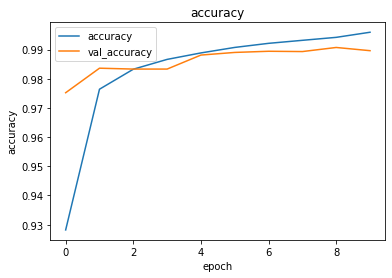

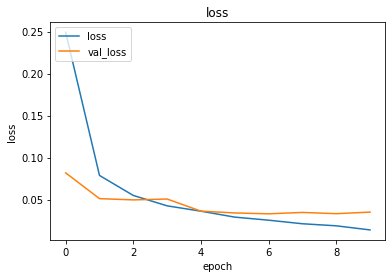

In [3]:
# CNN baseline
cnn1_hist = run_mnist('mnist_cnn_v1', cnn=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.3667 - accuracy: 0.8866 - val_loss: 0.0830 - val_accuracy: 0.9730

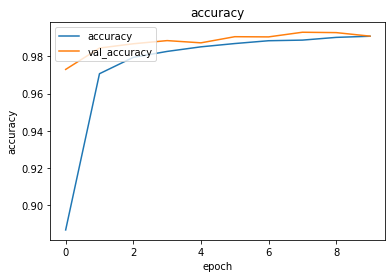

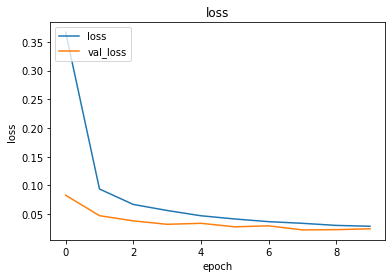

In [4]:
# A bit more complex CNN
cnn2_hist = run_mnist('mnist_cnn_v2', cnn=True)

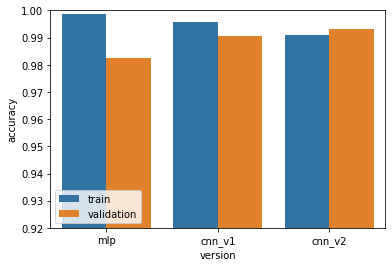

In [19]:
analyse_accuracy([mlp_hist, cnn1_hist, cnn2_hist], 
                 ['mlp', 'cnn_v1', 'cnn_v2'])
